In [1]:
import pandas as pd
import numpy as np
import os
import shutil

In [2]:
no_damage = []
data_dir = "./data/images"
labels = os.listdir("./data/labels")
paths = [i.split(".")[0] for i in labels]

for image in os.listdir(data_dir):
    if image.split(".")[0] not in paths:
        no_damage.append(image)
len(no_damage)

8403

In [4]:
df = pd.DataFrame()
df['no_damage'] = no_damage
df.to_csv("no_damage_list.csv")

In [5]:
for image in no_damage:
    shutil.move(src=f"{data_dir}/{image}", dst=f"./indo_classification/images/normal/{image}")

In [6]:
len(os.listdir(data_dir))

26660

In [8]:
df = pd.DataFrame()
df['damage_path'] = labels
df.to_csv("damaga_path_labels_list.csv")

In [9]:
for image in os.listdir(data_dir):
    shutil.move(src=f"{data_dir}/{image}", dst=f"./indo_classification/images/rusak/{image}")

In [10]:
import splitfolders

# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio("./indo_classification/images", 
                   output="./indo_classification/data",
                   seed=1337, ratio=(.8, .1, .1), group_prefix=None, move=False)

Copying files: 41705 files [04:19, 160.62 files/s]


In [11]:
data_dir = "./indo_classification/data"

from ultralytics import YOLO
model = YOLO("yolov8n-cls.pt")

model.train(data=data_dir, epochs=15, save=True)

New https://pypi.org/project/ultralytics/8.0.122 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.0.112  Python-3.9.13 torch-2.0.1+cu118 CUDA:0 (NVIDIA GeForce RTX 3050 Ti Laptop GPU, 4096MiB)
yolo\engine\trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=C:/Users/vnang/Documents/Lomba/GEMASTIK 2023/RDD Using YOLO/indo_classification/data, epochs=15, patience=50, batch=16, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=0, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_st

In [12]:
test_dir = "./test"
test_path = []
labels = []

for label in os.listdir(test_dir):
    for image in os.listdir(f"{test_dir}/{label}"):
        test_path.append(f"{test_dir}/{label}/{image}")
        labels.append(label)

test_data = pd.DataFrame()
test_data['test_path'] = test_path
test_data['labels'] = labels
test_data

,test_path,labels
0,./test/normal/China_Drone_000218.jpg,normal
1,./test/normal/China_Drone_000256.jpg,normal
2,./test/normal/Czech_000034.jpg,normal
3,./test/normal/Czech_000039.jpg,normal
4,./test/normal/Czech_000057.jpg,normal
...,...,...
4167,./test/rusak/Y_49650.jpeg,rusak
4168,./test/rusak/Y_50340.jpeg,rusak
4169,./test/rusak/Y_53690.jpeg,rusak
4170,./test/rusak/Y_53700.jpeg,rusak


In [13]:
test_data = test_data.sample(frac = 1)
test_data

,test_path,labels
562,./test/normal/Japan_000183.jpg,normal
661,./test/normal/Norway_000334.jpg,normal
4027,./test/rusak/United_States_004388.jpg,rusak
3816,./test/rusak/United_States_002324.jpg,rusak
1428,./test/rusak/China_Drone_001516.jpg,rusak
...,...,...
1033,./test/normal/Norway_006012.jpg,normal
3264,./test/rusak/Norway_001051.jpg,rusak
1653,./test/rusak/China_MotorBike_001331.jpg,rusak
2607,./test/rusak/Japan_004979.jpg,rusak


In [20]:
import numpy as np
import PIL.Image as Image

model_best = YOLO("./runs/classify/train4/weights/best.pt")
preds = []

for image_path in test_data['test_path']:
    image = np.array(Image.open(image_path))
    predictions = model_best(image)
    p_normal = predictions[0].probs.data[0].item()
    p_rusak = predictions[0].probs.data[1].item()
    if p_normal > p_rusak:
        preds.append("normal")
    else:
        preds.append("rusak")


0: 224x224 rusak 0.98, normal 0.02, 8.5ms
Speed: 4.0ms preprocess, 8.5ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)



0: 224x224 normal 0.71, rusak 0.29, 7.0ms
Speed: 3.0ms preprocess, 7.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 rusak 1.00, normal 0.00, 6.0ms
Speed: 2.0ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 rusak 1.00, normal 0.00, 7.0ms
Speed: 38.0ms preprocess, 7.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 rusak 1.00, normal 0.00, 7.0ms
Speed: 2.0ms preprocess, 7.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 normal 0.65, rusak 0.35, 6.4ms
Speed: 2.5ms preprocess, 6.4ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 normal 0.98, rusak 0.02, 7.1ms
Speed: 2.1ms preprocess, 7.1ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 rusak 0.53, normal 0.47, 6.6ms
Speed: 2.0ms preprocess, 6.6ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 rusak 0.60, no

In [21]:
test_data['pred'] = preds
test_data

,test_path,labels,pred,label_score,pred_score
562,./test/normal/Japan_000183.jpg,normal,rusak,0,0
661,./test/normal/Norway_000334.jpg,normal,normal,0,0
4027,./test/rusak/United_States_004388.jpg,rusak,rusak,1,0
3816,./test/rusak/United_States_002324.jpg,rusak,rusak,1,0
1428,./test/rusak/China_Drone_001516.jpg,rusak,rusak,1,1
...,...,...,...,...,...
1033,./test/normal/Norway_006012.jpg,normal,normal,0,0
3264,./test/rusak/Norway_001051.jpg,rusak,rusak,1,0
1653,./test/rusak/China_MotorBike_001331.jpg,rusak,rusak,1,0
2607,./test/rusak/Japan_004979.jpg,rusak,rusak,1,0


In [22]:
labels_score = []
for i in test_data['labels']:
    if i == "normal":
        labels_score.append(0)
    else:
        labels_score.append(1)


pred_score = []
for i in test_data['pred']:
    if i == "normal":
        pred_score.append(0)
    else:
        pred_score.append(1)

test_data['label_score'] = labels_score
test_data['pred_score'] = pred_score

In [23]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

acc = accuracy_score(test_data['label_score'], test_data['pred_score'])
f1 = f1_score(test_data['label_score'], test_data['pred_score'])
precs = precision_score(test_data['label_score'], test_data['pred_score'])
rec = recall_score(test_data['label_score'], test_data['pred_score'])

print("accuracy:", acc)
print("f1:", f1)
print("precision:", precs)
print("recall:", rec)

accuracy: 0.7919463087248322
f1: 0.8614746249601022
precision: 0.8261401897765535
recall: 0.8999666555518506


In [24]:
test_data.to_csv("yolov8train4result.csv")

In [26]:
preds = []

for image_path in os.listdir("./twitter"):
    image = np.array(Image.open(f"./twitter/{image_path}"))
    predictions = model_best(image)
    p_normal = predictions[0].probs.data[0].item()
    p_rusak = predictions[0].probs.data[1].item()
    if p_normal > p_rusak:
        preds.append("normal")
    else:
        preds.append("rusak")


0: 224x224 rusak 1.00, normal 0.00, 5.0ms
Speed: 3.2ms preprocess, 5.0ms inference, 1.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 rusak 1.00, normal 0.00, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 rusak 1.00, normal 0.00, 6.3ms
Speed: 2.3ms preprocess, 6.3ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 rusak 1.00, normal 0.00, 6.5ms
Speed: 2.0ms preprocess, 6.5ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 rusak 1.00, normal 0.00, 7.5ms
Speed: 1.0ms preprocess, 7.5ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 rusak 1.00, normal 0.00, 6.7ms
Speed: 1.0ms preprocess, 6.7ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 rusak 0.88, normal 0.12, 6.0ms
Speed: 1.0ms preprocess, 6.0ms inference, 0.0ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 rusak 1.00, nor

In [27]:
print(preds)

['rusak', 'rusak', 'rusak', 'rusak', 'rusak', 'rusak', 'rusak', 'rusak', 'normal', 'rusak', 'rusak']


In [1]:
import pandas as pd

yolo4 = pd.read_csv("yolov8train4result.csv")
yolo4

,Unnamed: 0,test_path,labels,pred,label_score,pred_score
0,562,./test/normal/Japan_000183.jpg,normal,rusak,0,1
1,661,./test/normal/Norway_000334.jpg,normal,normal,0,0
2,4027,./test/rusak/United_States_004388.jpg,rusak,rusak,1,1
3,3816,./test/rusak/United_States_002324.jpg,rusak,rusak,1,1
4,1428,./test/rusak/China_Drone_001516.jpg,rusak,rusak,1,1
...,...,...,...,...,...,...
4167,1033,./test/normal/Norway_006012.jpg,normal,normal,0,0
4168,3264,./test/rusak/Norway_001051.jpg,rusak,rusak,1,1
4169,1653,./test/rusak/China_MotorBike_001331.jpg,rusak,rusak,1,1
4170,2607,./test/rusak/Japan_004979.jpg,rusak,rusak,1,1


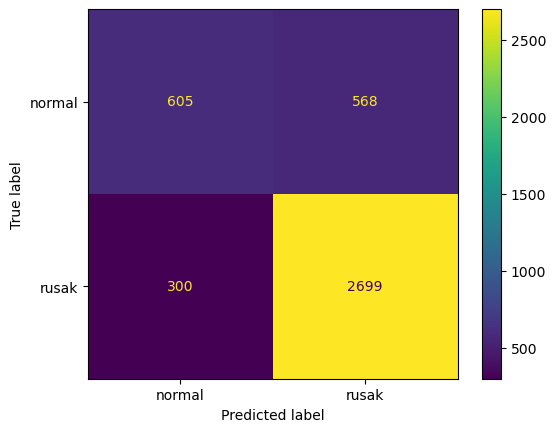

In [2]:
from sklearn import metrics
import matplotlib.pyplot as plt

cm = metrics.confusion_matrix(list(yolo4['label_score']), list(yolo4['pred_score']))
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ["normal", "rusak"])
cm_display.plot()
plt.show()